In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re
import time
import sys

In [3]:
CHANNEL_TITLE = input("Filename (Should match the channel title): ")
topic = input("topic to get statistics of: ")

Filename (Should match the channel title):  Dolphine 254
topic to get statistics of:  .


## Preprocessing

In [4]:
try:
    df = pd.read_csv(f"./data/{CHANNEL_TITLE}.csv")
except:
    print(f"File with {CHANNEL_TITLE} has not been found")
    time.sleep(5)
    sys.exit()

In [5]:
try:
    df.viewCount
    df.likeCount
except AttributeError:
    print("viewCount and likeCount columns not found in dataframe")
    time.sleep(5)
    sys.exit()

In [7]:
# Filtering by serach time
df_ = df[df.title.str.contains(topic)]

In [ ]:
# Setting publish date as inde
df.date_published = pd.to_datetime(df.date_published)

df.set_index('date_published', inplace=True)
df.head(2)

## Plots (Overall)

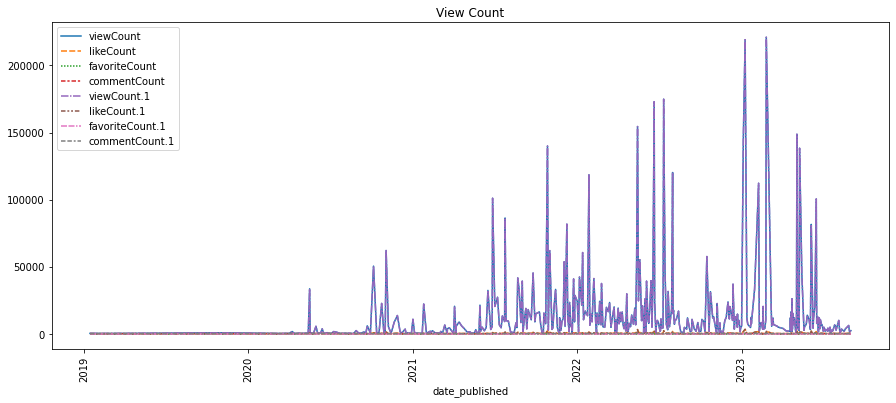

In [23]:
plt.figure(figsize=(15, 6))
sns.lineplot(df)
plt.title("View Count")
plt.xticks(rotation=90)
plt.show()

In [10]:
np.median(df.viewCount)

4880.5

In [11]:
if df_.shape[0] != 0:
    # Most viewed video
    most_viewed= list(df_.sort_values(by='viewCount', ascending=False).title)[0]
    print(f"For Topic: {topic} \n\n Most Viewed: {most_viewed}")
else:
    most_viewed= list(df.sort_values(by='viewCount', ascending=False).title)[0]
    print(f"Pattern selected dataframe empty \n Diaplaying full dataframe stats \n\n Most Viewed: {most_viewed}")

For Topic: . 

 Most Viewed: Inside the MOST HYPED MALL in Kenya-CHINA SQUARE


## Duration
The documentation tells us as much about `contentDetails.duration`:
> The length of the video. The property value is an ISO 8601 duration. For example, for a video that is at least one minute long and less than one hour long, the duration is in the format PT#M#S, in which the letters PT indicate that the value specifies a period of time, and the letters M and S refer to length in minutes and seconds, respectively. The # characters preceding the M and S letters are both integers that specify the number of minutes (or seconds) of the video. For example, a value of PT15M33S indicates that the video is 15 minutes and 33 seconds long.

In [12]:
time_length = '17M'
df[df.duration.str.contains(time_length)]

,title,id,viewCount,likeCount,favoriteCount,commentCount,duration,viewCount.1,likeCount.1,favoriteCount.1,commentCount.1,duration.1,date_published
169,Inside a Multi-Million Luxurious Hotel in KEND...,H_M8D2POtQs,2885,84,0,38.0,PT17M20S,2887,84,0,38.0,PT17M20S,2022-07-20T18:44:00Z
211,Restoration of the old Mombasa Road||Southern ...,ReEfNw3iZwg,13972,412,0,80.0,PT17M29S,13972,412,0,80.0,PT17M29S,2022-05-01T17:02:37Z
221,What Kenyans think about Nairobi Expressway vs...,RF33VkAoHbs,3770,166,0,106.0,PT17M11S,3770,166,0,106.0,PT17M11S,2022-04-14T12:56:11Z
250,Nairobi Expressway Latest updates||More Beauti...,HDPjTg9ks0I,41115,669,0,161.0,PT17M16S,41115,669,0,161.0,PT17M16S,2022-02-06T16:14:19Z
251,Raw Unfiltered INSIDE WATAMU Villages ||Rarely...,qzOe0-wiXXY,8848,260,0,81.0,PT17M8S,8848,260,0,81.0,PT17M8S,2022-02-02T17:10:09Z
275,NAIROBI EXPRESSWAY is now a reality in Kenya. ...,Xr1iLSWRtJA,53638,767,0,178.0,PT17M20S,53638,767,0,178.0,PT17M20S,2021-12-02T17:17:42Z
341,Driving around Upper Hill Nairobi-Kenya//The S...,KesHKM8dXhw,8726,149,0,62.0,PT17M29S,8726,149,0,62.0,PT17M29S,2021-04-13T09:00:19Z
342,Driving to Eastleigh First Avenue through Nga...,ukmCKPkggYs,5365,139,0,65.0,PT17M54S,5365,139,0,65.0,PT17M54S,2021-04-06T12:00:39Z
